In [2]:
# now let's read in the same data using pandas to save it as a dataframe also inport numpy to manipulate the data
import pandas as pd
import numpy as np

df = pd.read_csv('acs2017_census_tract_data.csv') # read in the csv file
print(df)

           TractId        State           County  TotalPop   Men  Women  \
0       1001020100      Alabama   Autauga County      1845   899    946   
1       1001020200      Alabama   Autauga County      2172  1167   1005   
2       1001020300      Alabama   Autauga County      3385  1533   1852   
3       1001020400      Alabama   Autauga County      4267  2001   2266   
4       1001020500      Alabama   Autauga County      9965  5054   4911   
...            ...          ...              ...       ...   ...    ...   
73996  72153750501  Puerto Rico  Yauco Municipio      6011  3035   2976   
73997  72153750502  Puerto Rico  Yauco Municipio      2342   959   1383   
73998  72153750503  Puerto Rico  Yauco Municipio      2218  1001   1217   
73999  72153750601  Puerto Rico  Yauco Municipio      4380  1964   2416   
74000  72153750602  Puerto Rico  Yauco Municipio      3001  1343   1658   

       Hispanic  White  Black  Native  ...  Walk  OtherTransp  WorkAtHome  \
0           2.4   86.3

In [3]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           74001 non-null  int64  
 1   State             74001 non-null  object 
 2   County            74001 non-null  object 
 3   TotalPop          74001 non-null  int64  
 4   Men               74001 non-null  int64  
 5   Women             74001 non-null  int64  
 6   Hispanic          73305 non-null  float64
 7   White             73305 non-null  float64
 8   Black             73305 non-null  float64
 9   Native            73305 non-null  float64
 10  Asian             73305 non-null  float64
 11  Pacific           73305 non-null  float64
 12  VotingAgeCitizen  74001 non-null  int64  
 13  Income            72885 non-null  float64
 14  IncomeErr         72885 non-null  float64
 15  IncomePerCap      73256 non-null  float64
 16  IncomePerCapErr   73256 non-null  float6

In [4]:
df.describe() 

count     72885.000000
mean      61086.829265
std       30516.098180
min        2692.000000
25%       40357.000000
50%       54375.000000
75%       74659.000000
max      249750.000000
Name: Income, dtype: float64

Find the NA values

In [5]:
n= df.isna().sum()
n

TractId                0
State                  0
County                 0
TotalPop               0
Men                    0
Women                  0
Hispanic             696
White                696
Black                696
Native               696
Asian                696
Pacific              696
VotingAgeCitizen       0
Income              1116
IncomeErr           1116
IncomePerCap         745
IncomePerCapErr      745
Poverty              842
ChildPoverty        1110
Professional         811
Service              811
Office               811
Construction         811
Production           811
Drive                801
Carpool              801
Transit              801
Walk                 801
OtherTransp          801
WorkAtHome           801
MeanCommute          946
Employed               0
PrivateWork          811
PublicWork           811
SelfEmployed         811
FamilyWork           811
Unemployment         810
dtype: int64

In [6]:
# df.mean()
df_without_na = df.fillna(value=0)
n= df_without_na.isna().sum()
n

TractId             0
State               0
County              0
TotalPop            0
Men                 0
Women               0
Hispanic            0
White               0
Black               0
Native              0
Asian               0
Pacific             0
VotingAgeCitizen    0
Income              0
IncomeErr           0
IncomePerCap        0
IncomePerCapErr     0
Poverty             0
ChildPoverty        0
Professional        0
Service             0
Office              0
Construction        0
Production          0
Drive               0
Carpool             0
Transit             0
Walk                0
OtherTransp         0
WorkAtHome          0
MeanCommute         0
Employed            0
PrivateWork         0
PublicWork          0
SelfEmployed        0
FamilyWork          0
Unemployment        0
dtype: int64

In [7]:
df.duplicated(subset=None, keep='first')

0        False
1        False
2        False
3        False
4        False
         ...  
73996    False
73997    False
73998    False
73999    False
74000    False
Length: 74001, dtype: bool

Detect outlier


In [8]:
#Histogram charts
import seaborn as sns
sns.set_style('whitegrid')
df_num = df_without_na.select_dtypes(include=['float64'])
df_without_na.hist(figsize =(14,12))

/Users/fabiosavorgnan/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


array([[<AxesSubplot:title={'center':'TractId'}>,
        <AxesSubplot:title={'center':'TotalPop'}>,
        <AxesSubplot:title={'center':'Men'}>,
        <AxesSubplot:title={'center':'Women'}>,
        <AxesSubplot:title={'center':'Hispanic'}>,
        <AxesSubplot:title={'center':'White'}>],
       [<AxesSubplot:title={'center':'Black'}>,
        <AxesSubplot:title={'center':'Native'}>,
        <AxesSubplot:title={'center':'Asian'}>,
        <AxesSubplot:title={'center':'Pacific'}>,
        <AxesSubplot:title={'center':'VotingAgeCitizen'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'IncomeErr'}>,
        <AxesSubplot:title={'center':'IncomePerCap'}>,
        <AxesSubplot:title={'center':'IncomePerCapErr'}>,
        <AxesSubplot:title={'center':'Poverty'}>,
        <AxesSubplot:title={'center':'ChildPoverty'}>,
        <AxesSubplot:title={'center':'Professional'}>],
       [<AxesSubplot:title={'center':'Service'}>,
        <AxesSubplot:titl

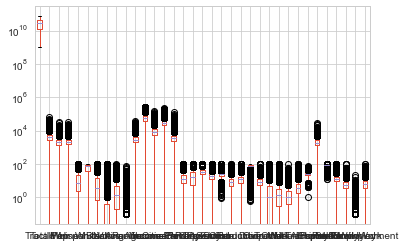

In [117]:
# Box plot of the diferents variables to gain more general information of the distribution values in the variables
ax = df_without_na.boxplot()
ax.set_yscale('log')

In [118]:
# Detteact the outliers
df_without_na.describe()
outliers = df_without_na[df_without_na[:] > df_without_na[:].mean() + 3 * df_without_na[:].std()]
outliers


,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73996,NaN,NaN,NaN,NaN,NaN,NaN,99.7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73997,NaN,NaN,NaN,NaN,NaN,NaN,99.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.3
73998,NaN,NaN,NaN,NaN,NaN,NaN,99.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
73999,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.5


In [119]:
df_without_na[3:][np.abs(df_without_na[3:] -df_without_na[3:].mean()) <= (3*df_without_na[3:].std())]
# keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.

df_without_na[3:][~(np.abs(df_without_na[3:] -df_without_na[3:].mean()) > (3*df_without_na[3:].std()))]
# or if you prefer the other way around

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
3,1001020400,Alabama,Autauga County,4267.0,2001.0,2266.0,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849.0,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965.0,5054.0,4911.0,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787.0,71.4,24.1,4.5,0.0,2.3
5,1001020600,Alabama,Autauga County,3620.0,1765.0,1855.0,3.0,70.7,25.1,0.0,...,0.7,3.5,8.0,21.1,1364.0,84.0,14.1,1.9,0.0,6.1
6,1001020700,Alabama,Autauga County,3420.0,1459.0,1961.0,4.0,78.0,13.7,0.6,...,0.0,0.0,0.0,16.4,1418.0,77.4,17.6,5.0,0.0,16.9
7,1001020801,Alabama,Autauga County,2913.0,1495.0,1418.0,4.2,86.3,7.1,1.5,...,0.0,0.7,5.2,24.6,1369.0,72.7,17.5,8.8,1.0,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73996,72153750501,Puerto Rico,Yauco Municipio,6011.0,3035.0,2976.0,NaN,0.3,0.0,0.0,...,0.5,0.0,3.6,26.9,1576.0,59.2,33.8,7.0,0.0,20.8
73997,72153750502,Puerto Rico,Yauco Municipio,2342.0,959.0,1383.0,NaN,0.9,0.0,0.0,...,0.0,0.0,1.3,25.3,666.0,58.4,35.4,6.2,0.0,NaN
73998,72153750503,Puerto Rico,Yauco Municipio,2218.0,1001.0,1217.0,NaN,0.2,0.0,0.0,...,3.4,0.0,3.4,23.5,560.0,57.5,34.5,8.0,0.0,NaN
73999,72153750601,Puerto Rico,Yauco Municipio,4380.0,1964.0,2416.0,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,24.1,1062.0,67.7,30.4,1.9,0.0,NaN


In [126]:
# This peace of code is in order to show the sum of the STD of the outliers
out= np.abs(df_without_na[3:] -df_without_na[3:].mean()) > (3*df_without_na[3:].std())
out.sum(0)

Asian               1856
Black               2803
Carpool              852
ChildPoverty         763
Construction         784
County                 0
Drive               2384
Employed             740
FamilyWork          1414
Hispanic            2257
Income              1108
IncomeErr           1179
IncomePerCap        1291
IncomePerCapErr     1298
MeanCommute         1331
Men                  803
Native               550
Office              1187
OtherTransp         1320
Pacific              687
Poverty             1101
PrivateWork         1045
Production           576
Professional         153
PublicWork           894
SelfEmployed         970
Service              616
State                  0
TotalPop             793
TractId                0
Transit             2301
Unemployment        1352
VotingAgeCitizen     734
Walk                1496
White                  0
Women                816
WorkAtHome           947
dtype: int64

In [127]:
# this peace of code is in order to find the mean of the sum of the outliers
outm= np.abs(df_without_na[3:] -df_without_na[3:].mean()) > (3*df_without_na[3:].mean())
outm.sum(0)

Asian               4363
Black               5679
Carpool               74
ChildPoverty         372
Construction         202
County                 0
Drive                  0
Employed             140
FamilyWork          6679
Hispanic            4517
Income                18
IncomeErr            349
IncomePerCap         180
IncomePerCapErr      642
MeanCommute            0
Men                  127
Native              2717
Office                13
OtherTransp         2528
Pacific             4004
Poverty              427
PrivateWork            0
Production            39
Professional           0
PublicWork           139
SelfEmployed         167
Service               15
State                  0
TotalPop             126
TractId                0
Transit             5072
Unemployment         539
VotingAgeCitizen      84
Walk                3265
White                  0
Women                124
WorkAtHome           627
dtype: int64

We decided to eliminate the outlier and use the code below


In [128]:
df_no_otlier= df_without_na[3:][np.abs(df_without_na[3:] -df_without_na[3:].mean()) <= (3*df_without_na[3:].std())]
df_no_otlier

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
3,1001020400,NaN,NaN,4267.0,2001.0,2266.0,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849.0,75.8,19.7,4.5,0.0,6.1
4,1001020500,NaN,NaN,9965.0,5054.0,4911.0,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787.0,71.4,24.1,4.5,0.0,2.3
5,1001020600,NaN,NaN,3620.0,1765.0,1855.0,3.0,70.7,25.1,0.0,...,0.7,3.5,8.0,21.1,1364.0,84.0,14.1,1.9,0.0,6.1
6,1001020700,NaN,NaN,3420.0,1459.0,1961.0,4.0,78.0,13.7,0.6,...,0.0,0.0,0.0,16.4,1418.0,77.4,17.6,5.0,0.0,16.9
7,1001020801,NaN,NaN,2913.0,1495.0,1418.0,4.2,86.3,7.1,1.5,...,0.0,0.7,5.2,24.6,1369.0,72.7,17.5,8.8,1.0,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73996,72153750501,NaN,NaN,6011.0,3035.0,2976.0,NaN,0.3,0.0,0.0,...,0.5,0.0,3.6,26.9,1576.0,59.2,33.8,7.0,0.0,20.8
73997,72153750502,NaN,NaN,2342.0,959.0,1383.0,NaN,0.9,0.0,0.0,...,0.0,0.0,1.3,25.3,666.0,58.4,35.4,6.2,0.0,NaN
73998,72153750503,NaN,NaN,2218.0,1001.0,1217.0,NaN,0.2,0.0,0.0,...,3.4,0.0,3.4,23.5,560.0,57.5,34.5,8.0,0.0,NaN
73999,72153750601,NaN,NaN,4380.0,1964.0,2416.0,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,24.1,1062.0,67.7,30.4,1.9,0.0,NaN


# New variables
It would be nice to have the level of education in order to relate to other variables like race and income. For the race we will compare white race against a new variable "other races" created by the code below; and we will compare to a new variable Income_range(which would group income in low, medium and high). For better data exploaration we also created a job data frame with the profesional and services variables; in order to relate job to the new variable Income_range.

In [98]:
# let's break up the income variable
df_without_na['Income_range'] = pd.cut(df_without_na.Income,[0,41000,75000,249750],3,labels=['Low','Medium','High']) # this creates a new variable
df_without_na.Income_range
df_without_na["Other_race"]= df_without_na["Hispanic"]+df_without_na["Black"]+df_without_na["Native"]+df_without_na["Asian"]+df_without_na["Pacific"]
race= df_without_na[["Other_race","White","Income_range", "State"]]
race

,Other_race,White,Income_range,State
0,8.8,86.3,Medium,Alabama
1,56.6,41.6,Medium,Alabama
2,36.2,61.4,Medium,Alabama
3,17.4,80.3,Medium,Alabama
4,20.4,77.5,Medium,Alabama
...,...,...,...,...
73996,99.7,0.3,Low,Puerto Rico
73997,99.1,0.9,Low,Puerto Rico
73998,99.7,0.2,Low,Puerto Rico
73999,100.0,0.0,Low,Puerto Rico


In [99]:
job= df_without_na[["Professional", "Service", "State", "Income_range"]]
job

,Professional,Service,State,Income_range
0,38.5,15.6,Alabama,Medium
1,30.5,24.9,Alabama,Medium
2,27.9,19.4,Alabama,Medium
3,29.0,16.6,Alabama,Medium
4,48.8,13.8,Alabama,Medium
...,...,...,...,...
73996,42.2,25.3,Puerto Rico,Low
73997,34.4,13.4,Puerto Rico,Low
73998,29.3,23.6,Puerto Rico,Low
73999,29.8,20.6,Puerto Rico,Low


Text(0.5, 1.0, 'Relationship between Income and Profesional Job')

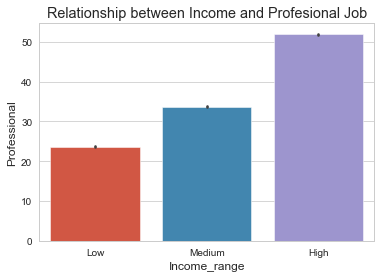

In [134]:
import seaborn as sns

sns.barplot(x='Income_range', y='Professional', data=job, saturation=0.8)
plt.title('Relationship between Income and Profesional Job')

Text(0.5, 1.0, 'Relationship between Income and Service Job')

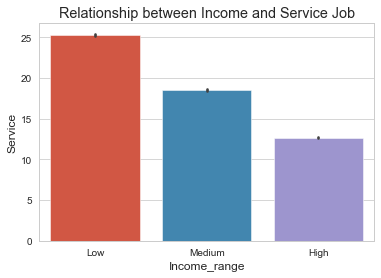

In [135]:
import seaborn as sns

sns.barplot(x='Income_range', y='Service', data=job, saturation=0.8)
plt.title('Relationship between Income and Service Job')

Text(0.5, 1.0, 'Relationship between Income and Other Races')

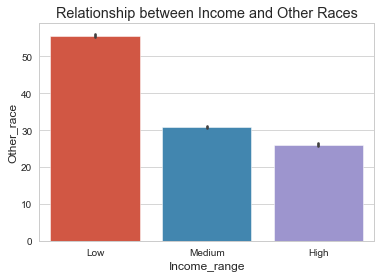

In [136]:
import seaborn as sns

sns.barplot(x='Income_range', y='Other_race', data=race, saturation=0.8)
plt.title('Relationship between Income and Other Races')

Text(0.5, 1.0, 'Relationship between Income and White Races')

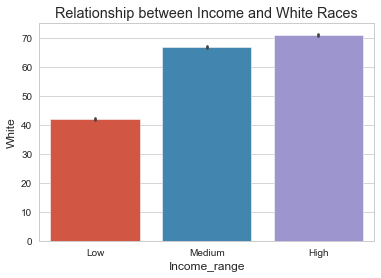

In [137]:
import seaborn as sns

sns.barplot(x='Income_range', y='White', data=race, saturation=0.8)
plt.title('Relationship between Income and White Races')

Text(0.5, 1.0, 'Relationship between Income among White-Race and Other Race')

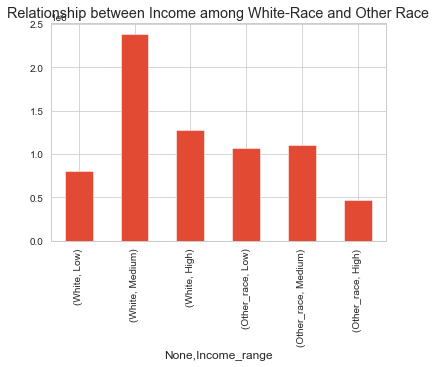

In [138]:
race.groupby("Income_range")[["White", "Other_race"]].sum().unstack().plot.bar()
plt.title('Relationship between Income among White-Race and Other Race')

Text(0.5, 1.0, 'Relationship between Income among Professional and Service Job')

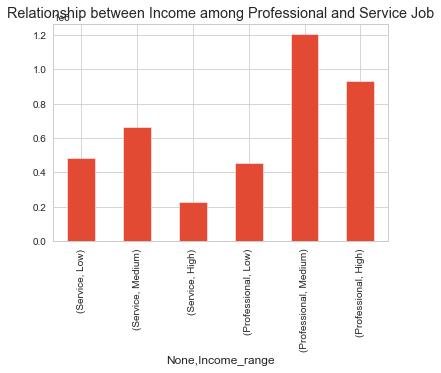

In [139]:
job.groupby("Income_range")[["Service", "Professional"]].sum().unstack().plot.bar()
plt.title('Relationship between Income among Professional and Service Job')

In [ ]:
#outliers=[]
#def detect_outlier(df_without_na):
    
    #threshold=3
    #mean_1 = np.mean(df_without_na)
    #std_1 =np.std(df_without_na)
    
    
    #for y in df_without_na:
        #z_score= (y - mean_1)/std_1 
        #if np.abs(z_score) > threshold:
            #outliers.append(y)
    #return outliers
#outlier_datapoints = detect_outlier(df_without_na[3:])
#print(outlier_datapoints)
#sorted(df_without_na[3:])
#q1, q3= np.percentile(df_without_na[4:],[25,75])
#iqr = q3 - q1
#lower_bound = q1 -(1.5 * iqr) 
#upper_bound = q3 +(1.5 * iqr) 
#df_new= [race["Other_race"],race["White"], job["Professional"],job["Service"],df_without_na["Income"], df_without_na["State"]]
#df_new= pd.DataFrame(df_new)
#df_new= df_new.T
#df_new
#df_grouped = df_new.groupby(by=["State"])
#print(df_grouped)
#print (df_grouped.Income.sum() / df_grouped.Income.count() *100)
#print (df_grouped.Other_race.sum() / df_grouped.Other_race.count() *100)
#print (df_grouped.White.sum() / df_grouped.White.count() *100)
#print (df_grouped.Professional.sum() / df_grouped.Professional.count() *100)
#print (df_grouped.Service.sum() / df_grouped.Service.count() *100)

# this python magics will allow plot to be embedded into the notebook
#import matplotlib.pyplot as plt
#import warnings
#warnings.simplefilter('ignore', DeprecationWarning)
#%matplotlib inline
#plt.style.use('ggplot')

#race_grouped = race.groupby(by=["Income_range"])
#race_grouped  = race_grouped.Other_race.sum() / df_grouped.White.sum()
#ax = race_grouped.plot(kind='barh')
#job_grouped = job.groupby(by=["Income_range"])
#job_grouped  = job_grouped.Professional.sum() / job_grouped.Service.sum()
#ax = job_grouped.plot(kind='barh')

# libraries
#import numpy as np
#import matplotlib.pyplot as plt
 
# Fake dataset
#height = [3, 12, 5, 18, 45]
#bars = ('A', 'B', 'C', 'D', 'E')
#y_pos = np.arange(len(bars))
 
# Create bars and choose color
#plt.bar(y_pos, height, color = (0.5,0.1,0.5,0.6))
 
# Add title and axis names
#plt.title('My title')
#plt.xlabel('categories')
#plt.ylabel('values')
 
# Limits for the Y axis
#plt.ylim(0,60)
 
# Create names
#plt.xticks(y_pos, bars)
 
# Show graphic
#plt.show()
